# **Bird Strikes in USA by FAA between 2000-2011.**



# 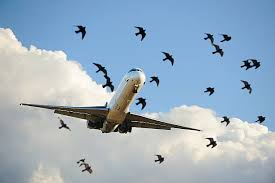

# **Introduction**
**A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll. The term is often expanded to cover other wildlife strikes - with bats or ground animals. Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents. Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.**

# **OBJECTIVES**



  ***Visuals Depicting the Number of Bird Strikes
  *Yearly Analysis
  *Total Struct By Wildlife: Size
  *Total Struct By Sky-Conditions
  *Total Struct By Origin State
  *Average Feet above the Ground Of Bird-Strike
  *Total Person Injured
  *Top 10 US Airlines in terms of having encountered bird strikes
  *Airports with most incidents of bird strikes(Top 50)
  *Yearly Cost Incurred due to Bird Strikes:
  *When do most bird strikes occur?
  *Altitude of airplanes at the time of strike
  *Phase of flight at the time of strike
  *Average Altitude of the airplanes in different phases at the time of strike
  *Effect of Bird Strikes
  *Impact on Flight
  *Effect of Strike at Different Altitude
  *Were Pilots Informed?
  *Prior Warning and Effect of Strike Relation**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
bs=pd.read_excel('/content/Bird Strikes_Final.xlsx')
bs.set_index('Record ID',inplace=True)
bs.head(5)


,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
Record ID,,,,,,,,,,,,,,,,,,,,,
202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,2,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,2,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


Removing Unwanted Columns ['Conditions: Precipitation', 'Remains of wildlife
collected?', 'Remains of wildlife sent to Smithsonian', 'Remarks','Wildlife: Species' ]



In [ ]:
bs.drop(columns=['Conditions: Precipitation','Remains of wildlife collected?','Remains of wildlife sent to Smithsonian','Remarks','Wildlife: Species' ],inplace=True)



**Getting Overview Of Dataset with info()**

In [ ]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25558 entries, 202152 to 319593
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Aircraft: Type                      25429 non-null  object        
 1   Airport: Name                       25429 non-null  object        
 2   Altitude bin                        25429 non-null  object        
 3   Aircraft: Make/Model                25558 non-null  object        
 4   Wildlife: Number struck             25429 non-null  object        
 5   Wildlife: Number Struck Actual      25558 non-null  int64         
 6   Effect: Impact to flight            25429 non-null  object        
 7   FlightDate                          25429 non-null  datetime64[ns]
 8   Effect: Indicated Damage            25558 non-null  object        
 9   Aircraft: Number of engines?        25291 non-null  object        
 10  Aircraft: Airlin

**Variable Description**

Record Id: Unique Id for the incidents

Aircraft Type: Type of aircraft

Aircraft Name: Name of aircraft

Altitude Bin: Altitude of aircraft <1000 and >1000

Aircraft make Model: Model number of aircraft

Wildlife number struck: Number of wildlife struck in the aircraft

Wildlife number struck actual: Actual no. of wildlife struck

Effect impact to flight: Effect of impact on flight

Flight Date: Date of flight

Effect indicated damage: Whether damage is caused to aircraft or not

Aircraft no. of Engines: No. of engines in aircraft

Aircraft Airline Operator: Name of airline operator

Origin State: Origin state for the aircraft

When phase of flight: Phase of flight

Wildlife Size: Size of the wildlife

Conditions Sky: Condition of the sky

Pilot warned of birds or wildlife: Whether the pilot is warned about the wildlife

Cost Total: Total cost incurred due to bird strike incidents

Feet above ground: Height of the plane during the incidents

Number of people injured: No. of people injured during the incidents

Is Aircraft large : whether the aircraft is large or not



**Remove Duplicate Records If any**

In [ ]:
bs=bs.drop_duplicates()


 **Creating new columnn 'Year' from FlightDate**

In [ ]:
import datetime as dt

In [ ]:
bs["Year"]=bs["FlightDate"].dt.strftime('%Y')

bs.head(2)

,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Origin State,When: Phase of flight,Wildlife: Size,Conditions: Sky,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
Record ID,,,,,,,,,,,,,,,,,,,,,
202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,...,New York,Climb,Medium,No Cloud,N,30736,1500.0,0,Yes,2000
208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,2,...,Texas,Landing Roll,Small,Some Cloud,Y,0,0.0,0,No,2001


**The Total Number of Bird Strikes**

In [ ]:
bs['Wildlife: Number Struck Actual'].sum()

68730

 **Yearly Analysis**

In [ ]:
bs.groupby('Year')[['Wildlife: Number Struck Actual']].sum()



,Wildlife: Number Struck Actual
Year,
2000,4553
2001,4719
2002,5502
2003,6187
2004,4349
2005,5134
2006,5837
2007,5067
2008,5349


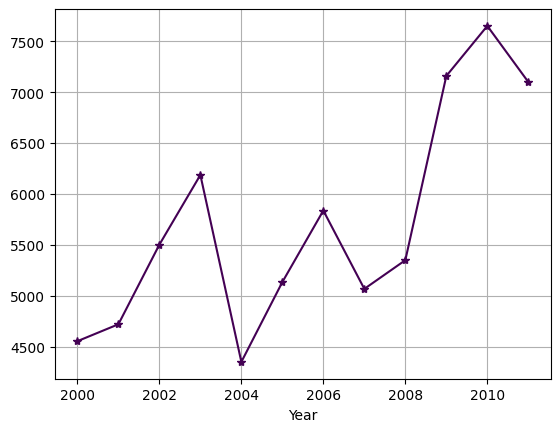

In [ ]:
bs.groupby('Year')['Wildlife: Number Struck Actual'].sum().plot(marker="*",cmap="viridis",grid=True)
plt.show()

**Total Struct By Sky Conditions**

In [ ]:
cond=bs.groupby('Conditions: Sky')['Wildlife: Number Struck Actual'].sum()
cond


Conditions: Sky
No Cloud      32582
Overcast      13688
Some Cloud    22460
Name: Wildlife: Number Struck Actual, dtype: int64

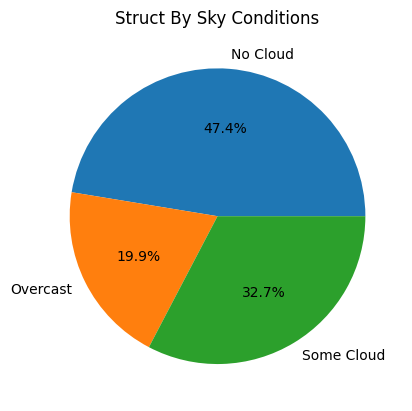

In [ ]:
plt.pie(cond,labels=cond.index,autopct='%2.1f%%')
plt.title('Struct By Sky Conditions')
plt.show()

**Total Struct By  Wildlife: Size**

In [ ]:
wild_size=bs.groupby('Wildlife: Size')['Wildlife: Number Struck Actual'].sum()
wild_size


Wildlife: Size
Large      4338
Medium    12294
Small     51978
Name: Wildlife: Number Struck Actual, dtype: int64

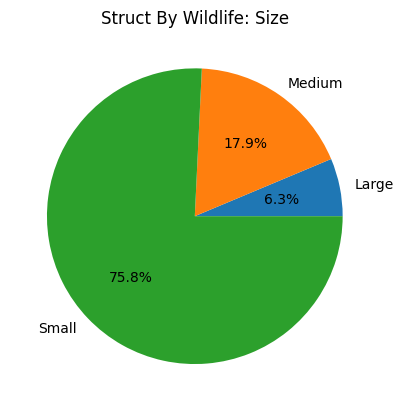

In [ ]:
plt.pie(wild_size,labels=wild_size.index,autopct='%0.1f%%')
plt.title('Struct By Wildlife: Size')
plt.show()

**Total Struct Origin Statewise**

In [ ]:
state=bs.groupby('Origin State')['Wildlife: Number Struck Actual'].sum()
state.sort_values(ascending=False).head(20)

Origin State
California        7116
Texas             6043
New York          4562
Florida           4084
Pennsylvania      3528
Illinois          2549
Hawaii            2079
Ohio              2067
Kentucky          2051
Missouri          1989
Tennessee         1862
Virginia          1822
New Jersey        1759
Washington        1697
Georgia           1659
North Carolina    1657
Utah              1401
DC                1385
Michigan          1357
Colorado          1283
Name: Wildlife: Number Struck Actual, dtype: int64

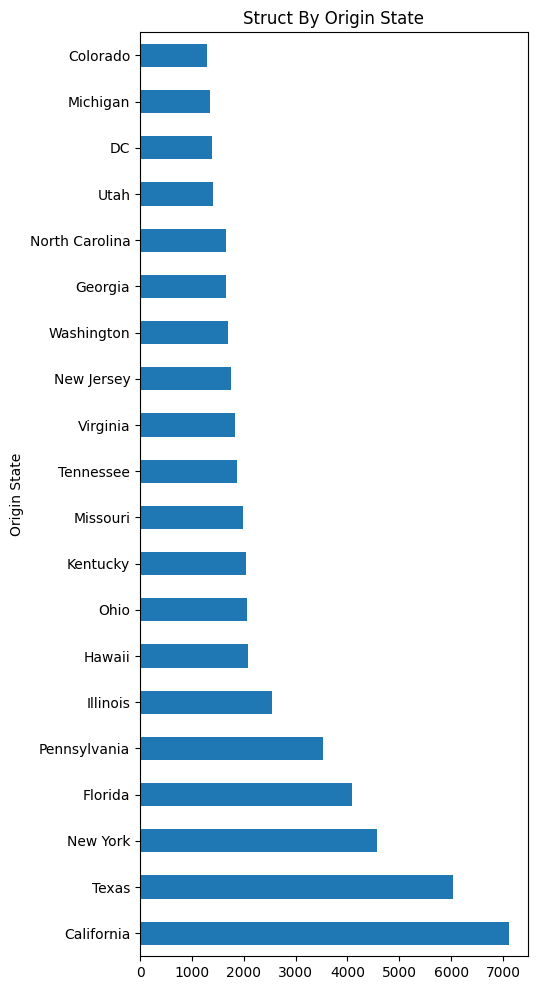

In [ ]:
state.sort_values(ascending=False).head(20).plot(kind='barh',figsize=(5,12),title='Struct By Origin State')
plt.show()

**Bird-Strike Average Feet above ground**

In [ ]:
avg_ft=round(bs['Feet above ground'].mean())
avg_ft

800

**Number of people injured**

In [ ]:
bs['Number of people injured'].sum()

27

**Airports with most incidents of bird strikes**

In [ ]:
airport_enct=bs.groupby('Airport: Name')['Wildlife: Number Struck Actual'].sum()
airport_enct.sort_values(ascending=False,inplace=True)
airport_enct.head(10)


Airport: Name
DALLAS/FORT WORTH INTL ARPT    2931
SACRAMENTO INTL                1855
LAGUARDIA NY                   1579
PHILADELPHIA INTL              1396
SALT LAKE CITY INTL            1376
SAN FRANCISCO INTL ARPT        1210
JOHN F KENNEDY INTL            1207
SEATTLE-TACOMA INTL            1181
NORFOLK INTL                   1119
BALTIMORE WASH INTL            1027
Name: Wildlife: Number Struck Actual, dtype: int64

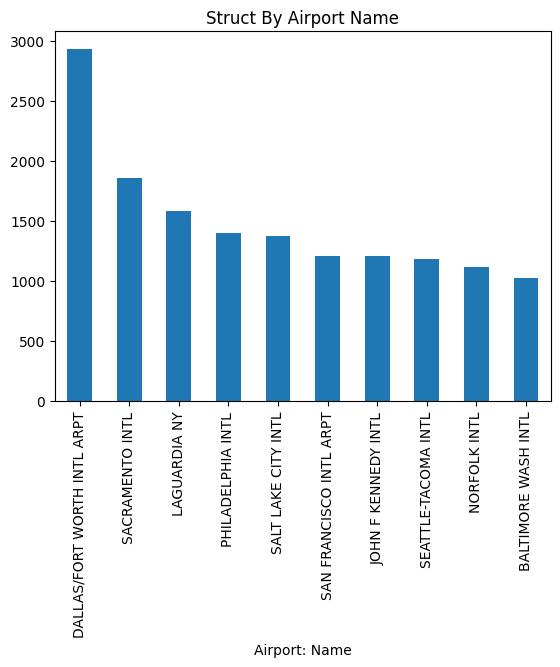

In [ ]:
airport_enct.head(10).plot(kind='bar',title="Struct By Airport Name")
plt.show()

**Top 10 US Airlines in terms of having encountered bird strikes**

In [ ]:
airlines_enct=bs.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum()
airlines_enct.sort_values(ascending=False,inplace=True)
airlines_enct.head(10)

Aircraft: Airline/Operator
BUSINESS                   9329
SOUTHWEST AIRLINES         9203
AMERICAN AIRLINES          6103
DELTA AIR LINES            3909
US AIRWAYS*                3377
AMERICAN EAGLE AIRLINES    2762
COMAIR AIRLINES            1984
UNITED AIRLINES            1930
SKYWEST AIRLINES           1918
JETBLUE AIRWAYS            1562
Name: Wildlife: Number Struck Actual, dtype: int64

<Axes: xlabel='Aircraft: Airline/Operator'>

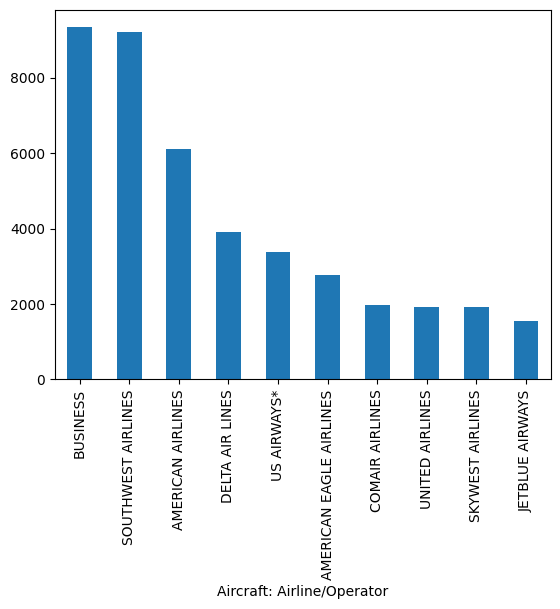

In [ ]:
airlines_enct.head(10).plot(kind='bar')

**Airports with most incidents of bird strikes – Top 50**

In [ ]:
airport_enct.head(50)

Airport: Name
DALLAS/FORT WORTH INTL ARPT               2931
SACRAMENTO INTL                           1856
LAGUARDIA NY                              1579
PHILADELPHIA INTL                         1396
SALT LAKE CITY INTL                       1376
SAN FRANCISCO INTL ARPT                   1210
JOHN F KENNEDY INTL                       1207
SEATTLE-TACOMA INTL                       1181
NORFOLK INTL                              1119
BALTIMORE WASH INTL                       1027
NASHVILLE INTL                            1003
LOGAN INTL                                 962
KANSAS CITY INTL                           921
CHARLOTTE/DOUGLAS INTL ARPT                917
CINCINNATI/NORTHERN KENTUCKY INTL ARPT     915
LOUISVILLE INTL ARPT                       914
ATLANTA INTL                               897
NEWARK LIBERTY INTL ARPT                   880
ORLANDO INTL                               855
DENVER INTL AIRPORT                        845
WASHINGTON DULLES INTL ARPT                826

<Axes: ylabel='Airport: Name'>

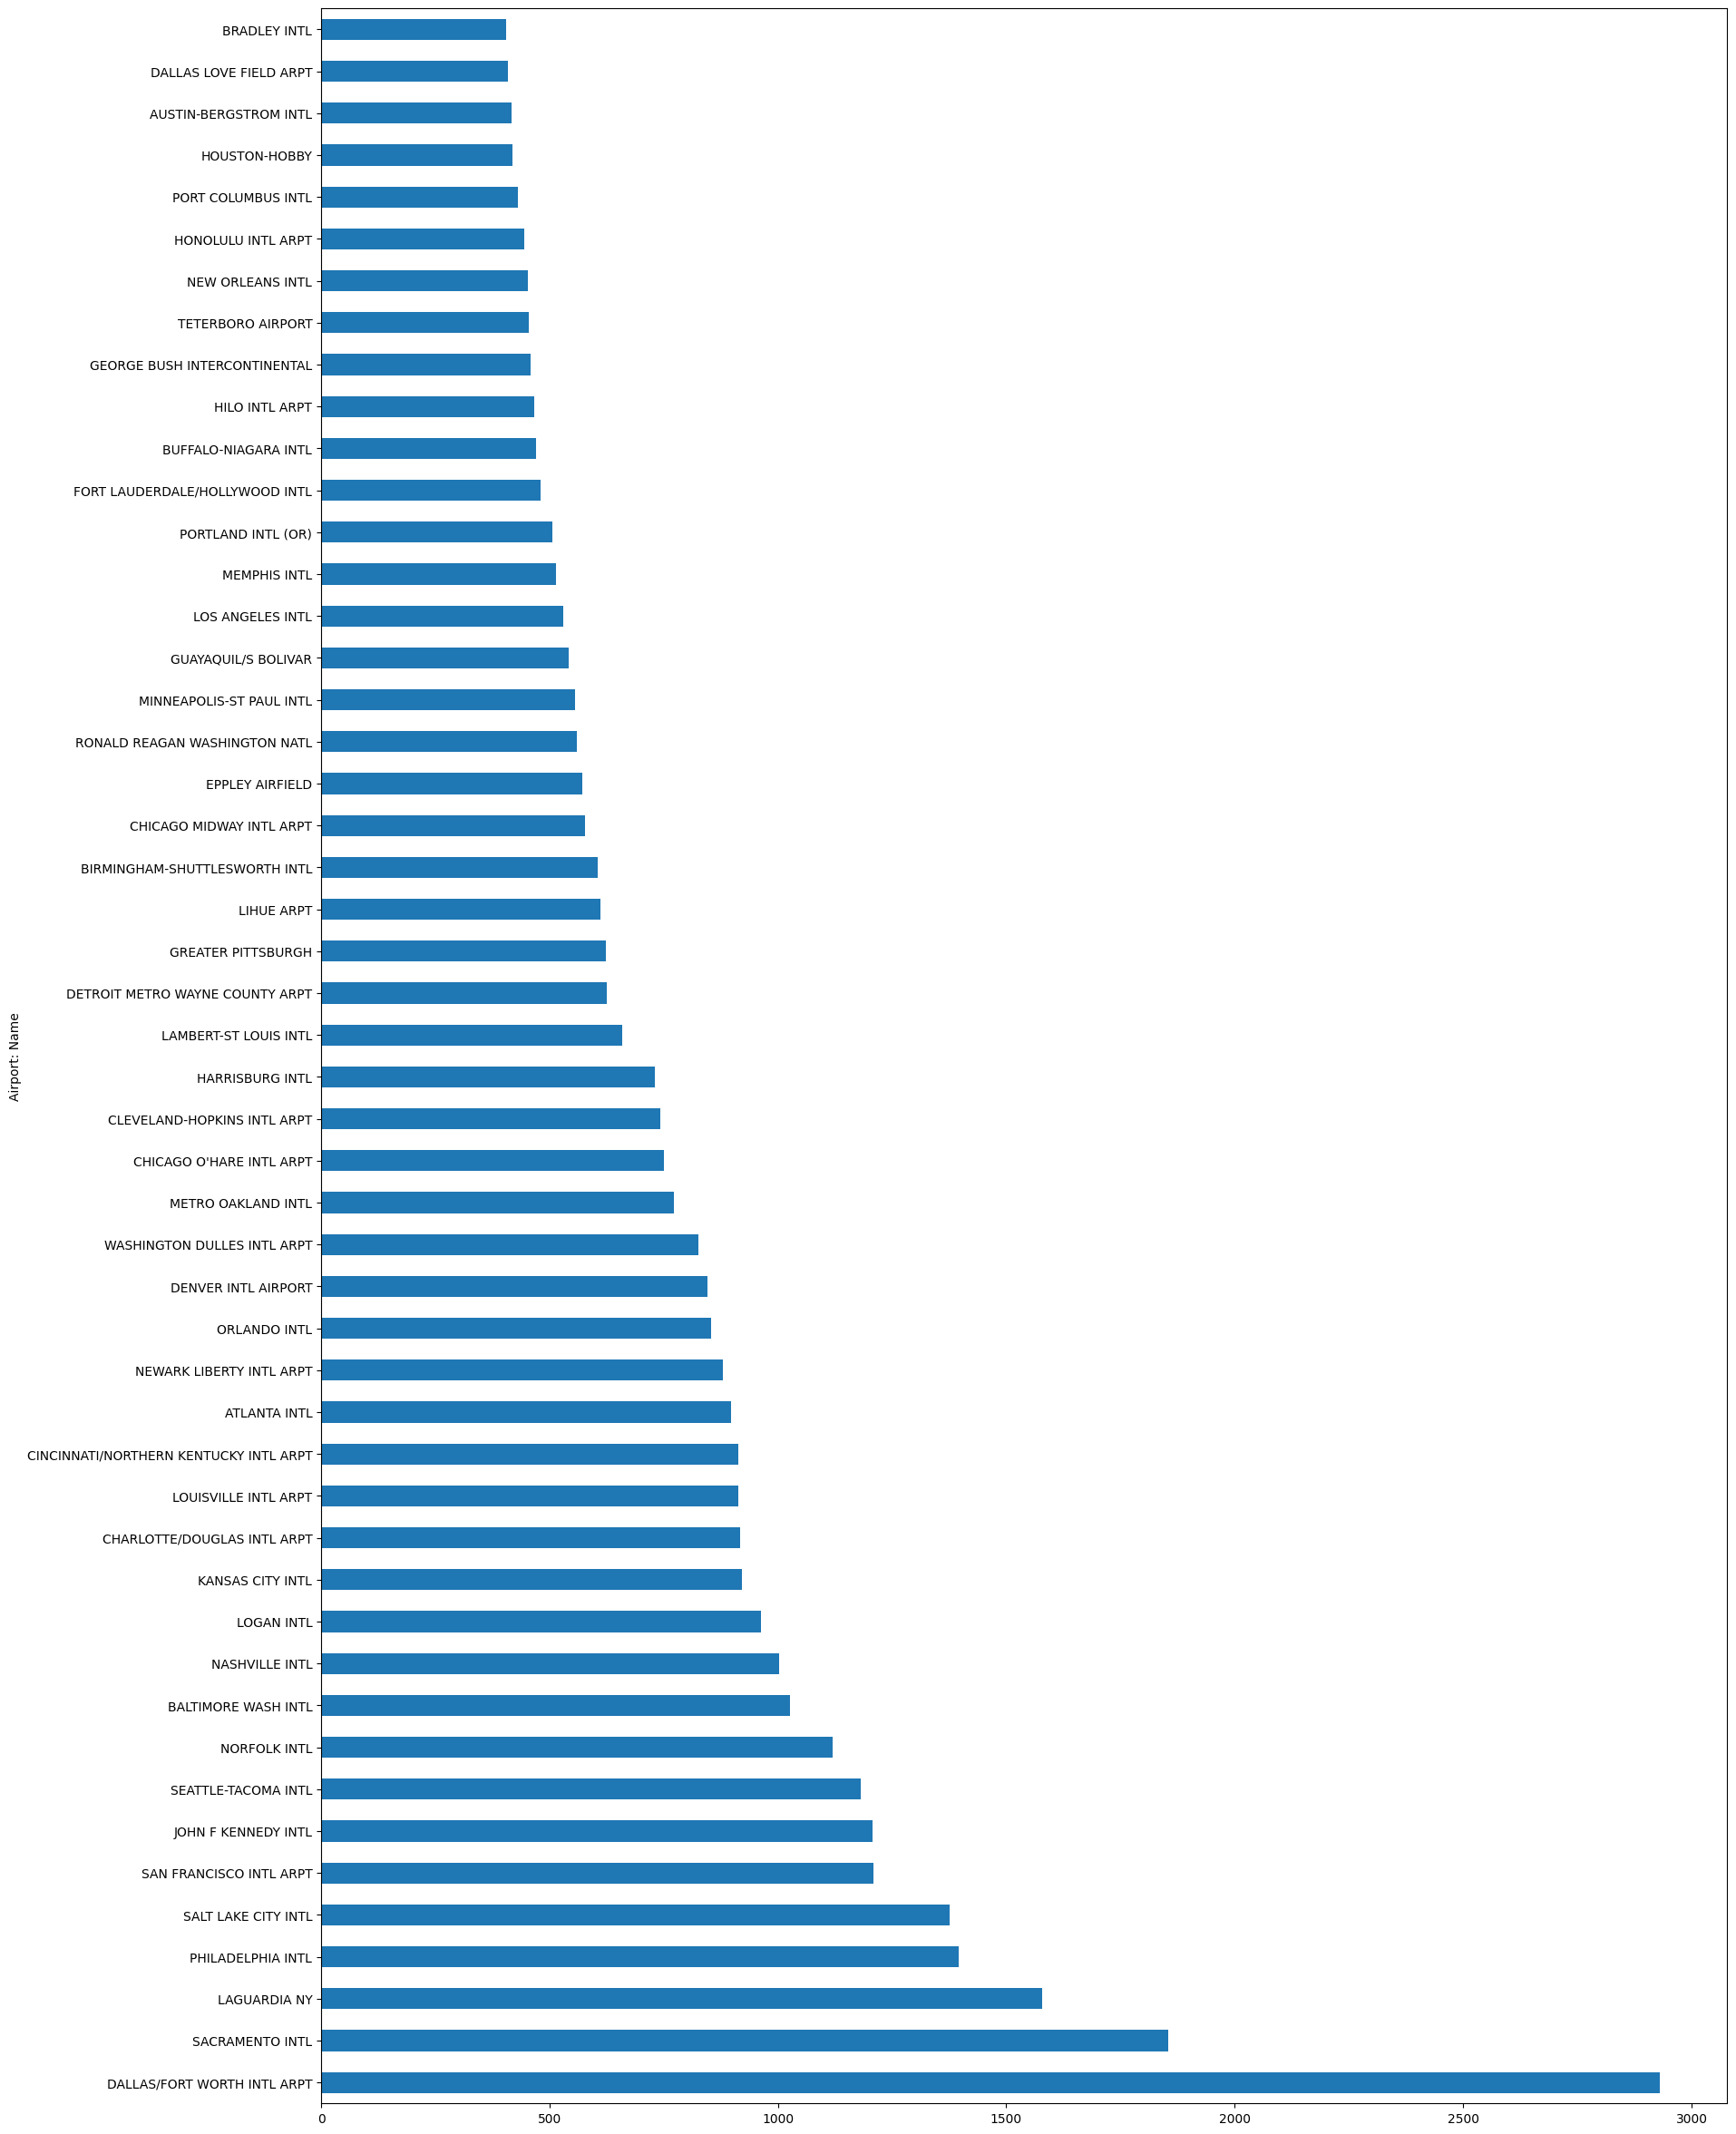

In [ ]:
airport_enct.head(50).plot(kind='barh',figsize=(20,30))

**Yearly Cost Incurred due to Bird Strikes**

In [ ]:
yearly_cost=bs.groupby('Year')['Cost: Total $'].sum()
yearly_cost

Year
2000     5625496
2001    23252168
2002     9046405
2003    13176787
2004     8116866
2005     7026670
2006    18309903
2007    10822426
2008    11966121
2009     9564327
2010    11459879
2011    13180130
Name: Cost: Total $, dtype: int64

<Axes: xlabel='year'>

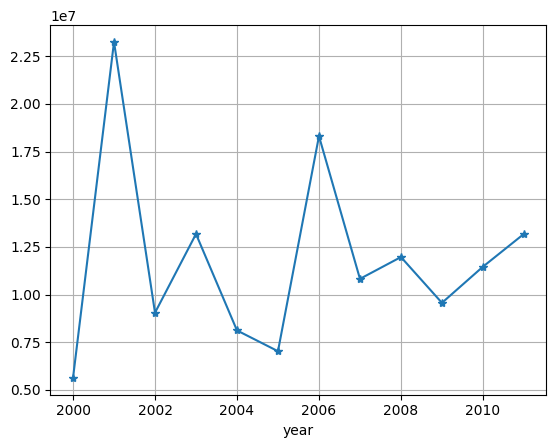

In [ ]:
bs.groupby('year')['Cost: Total $'].sum().plot(kind='line',marker='*',label='cost in ml $',grid=True)

**When do most bird strikes occur?**



In [ ]:
strike_occ=bs.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].count()
strike_occ.sort_values(ascending=False,inplace=True)
strike_occ.head(5)


When: Phase of flight
Approach        10367
Landing Roll     5033
Take-off run     4705
Climb            4427
Descent           776
Name: Wildlife: Number Struck Actual, dtype: int64

<Axes: ylabel='When: Phase of flight'>

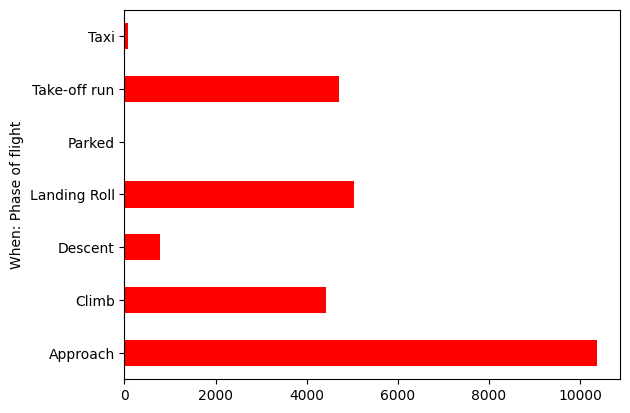

In [ ]:
bs.groupby('When: Phase of flight')['Wildlife: Number Struck Actual'].count().plot(kind='barh',color='red')

**Altitude of airplanes at the time of strike**

In [ ]:
att=bs.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum()
att



Altitude bin
< 1000 ft    59764
> 1000 ft     8846
Name: Wildlife: Number Struck Actual, dtype: int64

<Axes: ylabel='Altitude bin'>

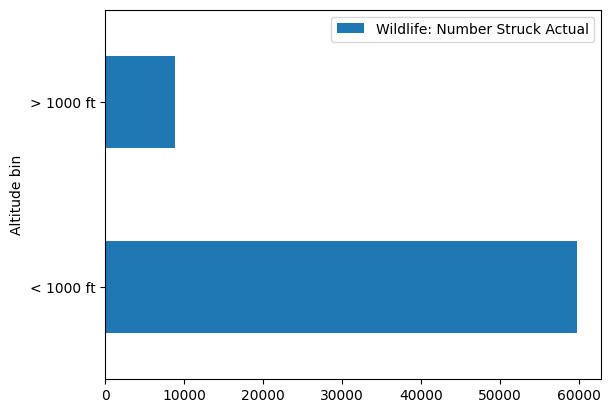

In [ ]:
bs.groupby('Altitude bin')['Wildlife: Number Struck Actual'].sum().plot(kind="barh",
                                                                    legend=True)

**Phase of flight at the time of strike**

In [ ]:
strike_occ

When: Phase of flight
Approach        10367
Landing Roll     5033
Take-off run     4705
Climb            4427
Descent           776
Taxi               74
Parked             10
Name: Wildlife: Number Struck Actual, dtype: int64

**Effect of Bird Strikes**

In [ ]:
eff=bs.groupby(['Effect: Indicated Damage','Effect: Impact to flight'])[['Effect: Impact to flight']].count()
eff

Effect: Impact to flight
Effect: Indicated Damage Effect: Impact to flight                          
Caused damage            Aborted Take-off                               128
                         Engine Shut Down                                78
                         None                                          1543
                         Other                                          163
                         Precautionary Landing                          542
No damage                Aborted Take-off                               351
                         Engine Shut Down                                10
                         None                                         21799
                         Other                                          227
                         Precautionary Landing                          578

**Impact on Flight**

In [ ]:
impact=bs.groupby('Effect: Impact to flight')['Effect: Impact to flight'].count()
impact.sort_values(ascending=False)


Effect: Impact to flight
None                     23316
Precautionary Landing     1119
Aborted Take-off           479
Other                      390
Engine Shut Down            88
Name: Effect: Impact to flight, dtype: int64

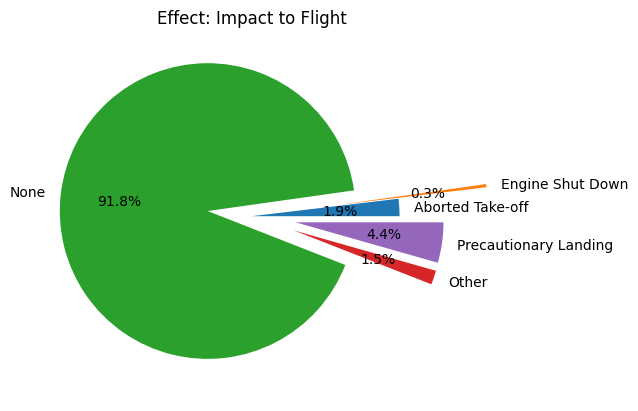

In [ ]:
plt.pie(impact, labels=impact.index, autopct='%0.1f%%',explode=[0,0.6,0.3,0.3,0.3])
plt.title('Effect: Impact to Flight')
plt.show()

**Effect of Strike at Different Altitude**

In [ ]:
effect_att=bs.groupby(['Altitude bin','Effect: Impact to flight'])[['Effect: Impact to flight']].count()
effect_att


Effect: Impact to flight
Altitude bin Effect: Impact to flight                          
< 1000 ft    Aborted Take-off                               479
             Engine Shut Down                                74
             None                                         18781
             Other                                          310
             Precautionary Landing                          876
> 1000 ft    Engine Shut Down                                14
             None                                          4535
             Other                                           80
             Precautionary Landing                          243

**Were Pilots Informed?**

In [ ]:
pilot_info=bs.groupby('Pilot warned of birds or wildlife?')['Pilot warned of birds or wildlife?'].count()
pilot_info

Pilot warned of birds or wildlife?
N    14562
Y    10857
Name: Pilot warned of birds or wildlife?, dtype: int64

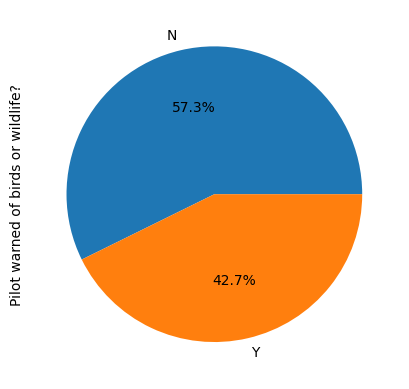

In [ ]:
pilot_info=bs.groupby('Pilot warned of birds or wildlife?')['Pilot warned of birds or wildlife?'].count().plot(kind='pie',autopct="%0.1f%%")


**Prior Warning and Effect of Strike Relation**

In [ ]:
bs.groupby(['Pilot warned of birds or wildlife?','Effect: Indicated Damage','Effect: Impact to flight'])['Effect: Indicated Damage'].count()


Pilot warned of birds or wildlife?  Effect: Indicated Damage  Effect: Impact to flight
N                                   Caused damage             Aborted Take-off               71
                                                              Engine Shut Down               45
                                                              None                         1014
                                                              Other                         104
                                                              Precautionary Landing         298
                                    No damage                 Aborted Take-off              179
                                                              Engine Shut Down                7
                                                              None                        12380
                                                              Other                         144
                                                 